<a href="https://colab.research.google.com/github/datajcthemax/playdata/blob/main/day25_CNN%26ResNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 25번째 이야기
- CNN과 ResNet

In [ ]:
import torch
from torch import nn
from torchvision import datasets
from torch.utils.data import DataLoader
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
# 데이터 준비
# 데이터 전처리
# train/test data
# dataloader
# model
# loss function
# optimizer
# hyper parameter
# training + test
# visualization

In [ ]:
# 데이터 준비
train_dataset = datasets.MNIST(root='./data', train=True, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, download=True)

In [ ]:
train_dataset.data.shape, test_dataset.data.shape

(torch.Size([60000, 28, 28]), torch.Size([10000, 28, 28]))

# EDA

In [ ]:
train_dataset.classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [ ]:
train_dataset.data.shape

torch.Size([60000, 28, 28])

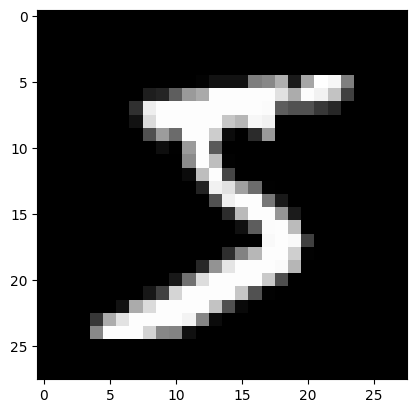

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_dataset.data[0], cmap='gray')

In [ ]:
train_dataset.data[0].shape # img.shape = (300,200,3)

torch.Size([28, 28])

In [ ]:
train_dataset.targets #label

tensor([5, 0, 4,  ..., 5, 6, 8])

tensor(0)

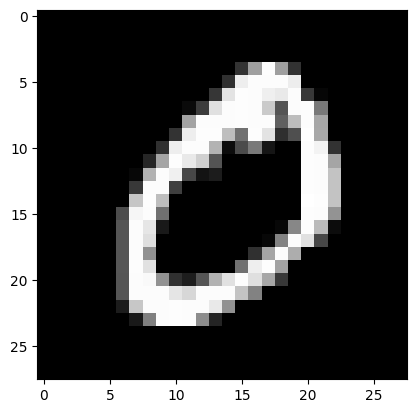

In [ ]:
plt.imshow(train_dataset.data[1], cmap='gray')
train_dataset.targets[1]

In [ ]:
train_dataset.data[0] # scaling

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

In [ ]:
train_dataset.data[0]/255 # minmax scale

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

In [ ]:
# [1,28,28] => squeeze = > [28,28]

In [ ]:
train_dataset.data[0].unsqueeze(0).shape

torch.Size([1, 28, 28])

In [ ]:
train_data = [(x.unsqueeze(0)/255, y) for x, y in zip(train_dataset.data, train_dataset.targets)]
test_data = [(x.unsqueeze(0)/255, y) for x, y in zip(test_dataset.data, test_dataset.targets)]

In [ ]:
train_data[0][0].min()

tensor(0.)

In [ ]:
# hyper parameter
BATCH_SIZE = 128
EPOCHS = 100
LEARNING_RATE = 1e-3

In [ ]:
train_loader = DataLoader(train_data, batch_size = BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_data, batch_size = BATCH_SIZE, shuffle=True)

In [ ]:
ll = nn.Linear(1,3)

In [ ]:
ll.weight

Parameter containing:
tensor([[ 0.0668],
        [ 0.6614],
        [-0.0828]], requires_grad=True)

In [ ]:
# model 생성
# Convolution, Maxpooling, flatten
class CNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Sequential(
        nn.Conv2d(1, 16, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2),
        nn.Dropout(0.2)
    )
    self.layer2 = nn.Sequential(
        nn.Conv2d(16, 32, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2),
        nn.Dropout(0.2)

    )
    self.softmax = nn.Softmax()
    self.fc = nn.Linear(7*7*32,10)
  def forward(self, x):
    x = self.layer1(x)
    x = self.layer2(x)
    x = x.view(x.size(0),-1)
    x = self.fc(x)
    x = self.softmax(x)
    return x

In [ ]:
model = CNN()
model.to(device)

CNN(
  (layer1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Dropout(p=0.2, inplace=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Dropout(p=0.2, inplace=False)
  )
  (softmax): Softmax(dim=None)
  (fc): Linear(in_features=1568, out_features=10, bias=True)
)

In [ ]:
from torch import optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

- 학습 상황 시각화
- 성능 지표 표시 : ex) 정확도
- 최적 성능 모델 저장
- early stopping
- 기타 등등 필요성이 느껴지는 문제 하나 해결

26번째 train_loss : 1.47 test_loss : 1.48 Accuracy : 98.36%


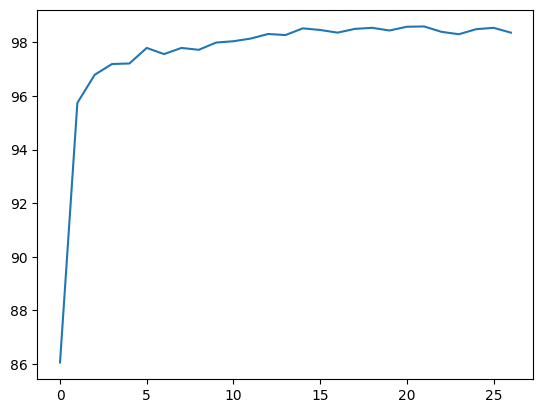

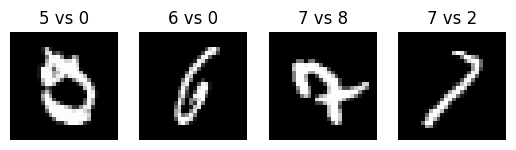

KeyboardInterrupt: ignored

In [ ]:
import numpy as np
from tqdm.auto import tqdm
from IPython.display import clear_output
total_acc = []
for epoch in range(EPOCHS):
  # 학습
  train_loss=[]
  for img, label in train_loader:
    optimizer.zero_grad()
    pred = model(img.to(device))
    loss = criterion(pred, label.to(device))
    loss.backward()
    optimizer.step()
    train_loss.append(loss.item())
  # 평가
  test_loss=[]
  test_sources = []
  with torch.no_grad():
    for img, label in test_loader:
      pred = model(img.to(device))
      loss = criterion(pred, label.to(device))
      # pred = model(img)
      # loss = criterion(pred, label)
      test_loss.append(loss.item())
      test_sources.append((img[pred.cpu().argmax(axis=1)!=label.cpu()],
                           label[pred.cpu().argmax(axis=1)!=label.cpu()],pred.cpu().argmax(axis=1)[pred.cpu().argmax(axis=1)!=label.cpu()])) # label과 pred 값이 다른 부분만 test_sources에 담기
  # 노트북 파일 기존 프린트 되었던 화면을 지우는 코드
  clear_output()

  # 인식 잘 안된 부분의 시각화를 위해서 img, label, pred를 모아서 정리
  imgs = [x[0] for x in test_sources]
  imgs = torch.cat(imgs, axis=0)
  labels = [x[1] for x in test_sources]
  labels = torch.cat(labels, axis=0)
  preds = [x[2] for x in test_sources]
  preds = torch.cat(preds, axis=0)

  # 정확도 계산을 위한 코드. 다양하게 다른 방법도 가능함
  # sklearn의 metric 이용하는 방법 추천
  wrongs = [len(x[0]) for x in test_sources]
  acc = round(100-(sum(wrongs)/100),2)

  # 정확도 추이를 보기 위하여 각 에폭에서의 정확도 정보 수집
  total_acc.append(acc)

  # 학습 진행 상황 출력
  print("{}번째 train_loss : {} test_loss : {} Accuracy : {}%".format(epoch, round(np.array(train_loss).mean(),2),round(np.array(test_loss).mean(),2),
                                                                   acc))
  if img.shape[0]<1:continue # 혹시 더이상 오분류 내용이 없으면 지나가도록 세팅

  # 정확도 그래프 그리기
  plt.plot(total_acc)
  plt.show()

  # 오분류 내용이 어떤건지 알기 위해 오분류 내용 4개 뽑아서 label과 pred 글자 넣어서 표시
  for i in range(4):
    plt.subplot(1,4,i+1)    
    plt.imshow(imgs[i][0], cmap='gray')    
    plt.title("{} vs {}".format(labels[i].item(),preds[i].item()))
    plt.axis('off')
  plt.show()

In [ ]:
img[pred.cpu().argmax(axis=1)!=label.cpu()].device

In [ ]:
x = np.linspace(0,10, 100)

In [ ]:
x

In [ ]:
y= np.linspace(0,100, 100)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot(x,y)

In [ ]:
xx = np.linspace(0, 1, 100)

In [ ]:
plt.plot(xx,y)

In [ ]:
y = 100*x # => 모델

In [ ]:
y = 10*x # => 모델

In [ ]:
features = ['온도','아이스크림판매량','아아 판매량','우산 판매량'] # label = 감정

In [ ]:
# corr, PCA => 온아아